In [1]:
%pylab inline
import seaborn
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-06-06 13:23:11,758] INFO in core: Started 


2020-04-30


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
M1,21.0,0.168568,0.130929,-0.044554,-0.036350,0.150502,0.356228,0.387791,1.226379,3.318658,1.039997,-0.010381
S&P 500,21.0,0.414380,0.407029,-0.428319,-0.196179,0.567417,0.974381,1.064715,0.998407,9.935274,3.726494,-0.602785
IRA,21.0,0.217535,0.359168,-0.443821,-0.312980,0.311474,0.639638,1.050732,0.583391,1.848634,4.507942,0.163047
CSI 300,21.0,0.294295,0.698207,-0.853192,-0.675136,0.202635,1.157561,1.504266,0.410043,6.240714,4.535716,-0.011020


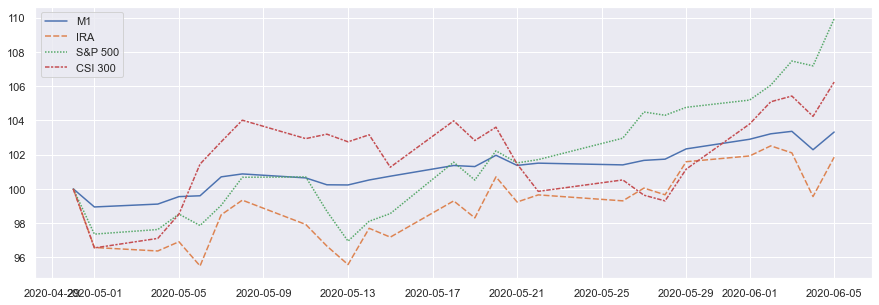

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2019-11-27


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
IRA,126.0,0.057493,1.853662,-7.145039,-3.788000,0.314129,1.803524,5.842426,0.026700,3.142411,46.663531,-1.433365
CSI 300,126.0,0.028090,0.840027,-3.009172,-1.689324,0.228267,0.993161,1.504266,0.023916,2.684032,20.174870,-1.340596
S&P 500,126.0,0.010917,1.038775,-3.782368,-2.419149,0.195427,1.333827,3.152724,0.002808,2.319346,33.717264,-0.990096
M1,126.0,-0.038958,0.716688,-3.100050,-1.733870,0.139356,0.658092,1.420292,-0.065521,-5.885577,23.204685,-2.211165


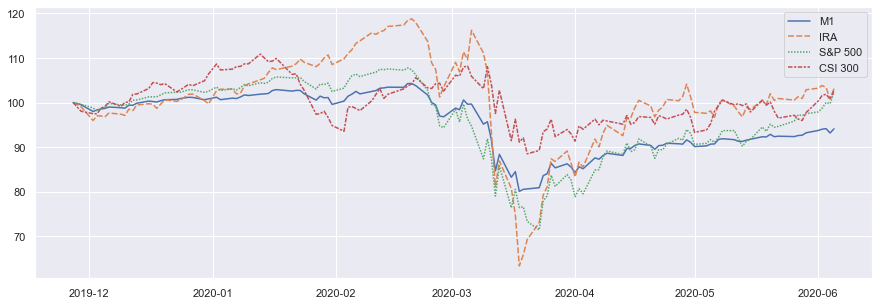

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

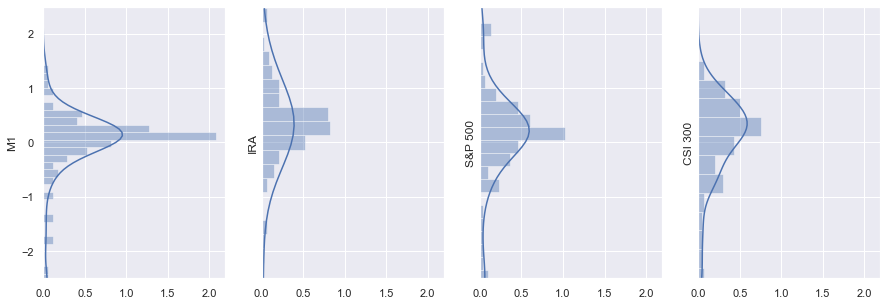

In [4]:
ret = frame.rolling(5).mean().pct_change() * 100
_, axes = plt.subplots(1, len(ret.columns), sharex=True, sharey=True)
for i, col in enumerate((ret.columns)):
    seaborn.distplot(ret[col], ax=axes[i], vertical=True)
_ = plt.setp(axes, ylim=[-2.5, +2.5])